In [4]:
# Instalar un paquete de conda en el kernel de Jupyter que estoy usando (también se puede correr con 'conda install' en la terminal, adentro del venv del curso
import sys
!conda install --yes --prefix {sys.prefix} numpy pandas matplotlib scikit-learn

Solving environment: ...working... done

# All requested packages already installed.



Ingrese ticker a graficar: TSLA
Ingrese el tipo de grafico que desea (1.Resumen o 2.Comparativo) 2.Comparativo
Ingrese fecha de inicio (en formato AAAA-mm-dd): 2022-01-01
Ingrese fecha de fin (en formato AAAA-mm-dd): 2022-12-31


Calculando graficos...


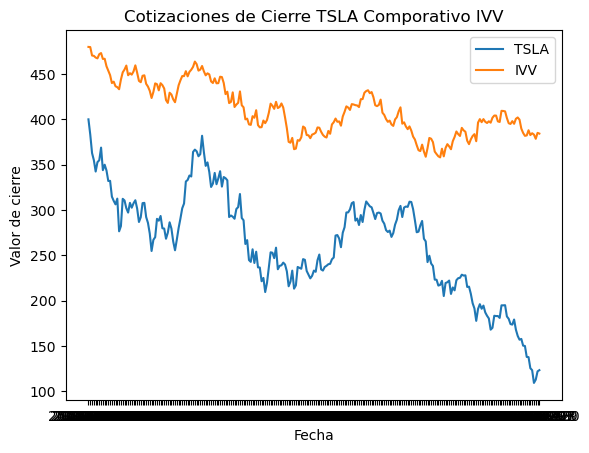

In [46]:
# Importamos las librerías con las que estaré trabajando (ahora o más adelante)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Indicamos la función de input para conocer sobre qué stock queremos graficar
stock = input("Ingrese ticker a graficar:")
tipo_grafico = input("Ingrese el tipo de grafico que desea (1.Resumen o 2.Comparativo)")
stock_inicio = input("Ingrese fecha de inicio (en formato AAAA-mm-dd):")
stock_fin =  input ("Ingrese fecha de fin (en formato AAAA-mm-dd):")
print("Calculando graficos...")
# En esta sección se inserta la función que luego retorna el gráfico requerido según input (1.Resumen o 2.Comparativo)
def grafico_resumen():
    # En esta sección se inserta la lógica para desarrollar el gráfico de 1.Resumen
    import sqlite3
    # Creamos una conexión con base de datos creada para almacenar historia desde el 01/01/2022
    con = sqlite3.connect('MisInversiones.db')
    # Creamos el curso para interactuar con los datos
    cursor = con.cursor()
    # Ejecutamos una consulta SELECT de SQL para traernos los valores que fueron solicitados en la consulta.
    cursor.execute(f"SELECT * FROM Stocks WHERE stock='{stock}' and fecha>='{stock_inicio}' and fecha<='{stock_fin}'")
    # Obtenemos los resultados
    resultados = cursor.fetchall()
    # Creamos listas vacías para las fechas y valores de cierre con el fin de poder diagramarlos en un eje x e y
    fechas = []
    valores = []
    # Recorremos los resultados de la consulta y agregamos las fechas y valores a las listas correspondientes
    for resultado in resultados:
        fechas.append(resultado[8])
        valores.append(resultado[4])
    # Dibujamos el gráfico de líneas y colocamos un título
    plt.plot(fechas,valores, label = stock)
    plt.title('Cotizaciones de Cierre '+ stock)
    plt.legend(loc='upper right')
    # Asignamos nombres a los ejes
    plt.xlabel('Fecha')
    plt.ylabel('Valor de cierre')
    # Mostramos el gráfico
    return plt.show()
def grafico_comparativo():
    # En esta sección se inserta la lógica para desarrollar el gráfico de 2.Comparativo, que es donde la acción seleccionada, se compara con el índece S&P 500 IVV.
    import sqlite3
    # Creamos una conexión con base de datos creada para almacenar historia desde el 01/01/2022
    con = sqlite3.connect('MisInversiones.db')
    # Creamos el curso para interactuar con los datos
    cursor = con.cursor()
    # Ejecutamos una consulta SELECT de SQL para traernos los valores que fueron solicitados en la consulta.
    cursor.execute(f"SELECT * FROM Stocks WHERE stock='{stock}' and fecha>='{stock_inicio}' and fecha<='{stock_fin}'")
    # Obtenemos los resultados
    resultados = cursor.fetchall()
    # Creamos listas vacías para las fechas y valores de cierre con el fin de poder diagramarlos en un eje x e y
    fechas = []
    valores = []
    # Recorremos los resultados de la consulta y agregamos las fechas y valores a las listas correspondientes
    for resultado in resultados:
        fechas.append(resultado[8])
        valores.append(resultado[4])
    # Ahora obtenemos los valores del IVV para poder incorporarlo al gráfico también como fechas y valores
    cursor.execute(f"SELECT * FROM Stocks WHERE stock='IVV' and fecha>='{stock_inicio}' and fecha<='{stock_fin}'")
    # Obtenemos los resultados
    resultados = cursor.fetchall()
    # Creamos listas vacías para las fechas y valores de cierre con el fin de poder diagramarlos en un eje x e y
    fechas_IVV = []
    valores_IVV = []
    # Recorremos los resultados de la consulta y agregamos las fechas y valores a las listas correspondientes
    for resultado in resultados:
        fechas_IVV.append(resultado[8])
        valores_IVV.append(resultado[4])
    # Dibujamos el gráfico de líneas y colocamos un título
    plt.plot(fechas,valores, label= stock)
    plt.plot(fechas_IVV,valores_IVV, label='IVV')
    plt.title('Cotizaciones de Cierre '+ stock + " Comporativo IVV")
    plt.legend(loc='upper right')
    # Asignamos nombres a los ejes
    plt.xlabel('Fecha')
    plt.ylabel('Valor de cierre')
    # Mostramos el gráfico
    return plt.show()
#El objetivo de esta sección es que en función del input de tipo de gráfico requerido, nos devuelva 1 de ellos, sin muchos pasos adicionales. Por otro lado, incorpora una opción de error, ante ingresos no correspondidos.
if tipo_grafico == "1.Resumen":
    grafico_resumen()
elif tipo_grafico == "2.Comparativo":
    grafico_comparativo()
else:
    print("Opción no válida.")